In [293]:
import warnings
warnings.filterwarnings(action='ignore')

In [294]:
import pandas as pd
import numpy as np
import seaborn as sns

In [295]:
path = 'C:\\Users\\Yoonhee\\Desktop\\수업자료, 과제\\대학원\\2학기\\자특론\\project\\machine learning\\'
mush = pd.read_csv(path+'mushroom.csv')

In [296]:
mush.shape

(8124, 23)

In [297]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 1. EDA 및 데이터 정리

In [298]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [299]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [300]:
# 각 column의 value count
for i in mush.columns:
    print(mush[i].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

데이터 설명서에 보면 stalk-root 변수에 missing은 ?으로 되어 있다고 기재되어있다. 이 부분은 누락되어 있는데 value count로 보아 missing인 부분이 2480개나 있기때문에 아예 stalk-root 변수를 제외하고 시작하는게 좋다고 판단했다.

In [301]:
mush = mush.drop('stalk-root', axis=1)

또한 veil-type의 value count를 보았을때 모두 p종류만을 갖고 있는 데이터이다. 그러므로 veil-type도 제외하고 데이터를 저장한다.

In [302]:
mush = mush.drop('veil-type', axis=1)

In [303]:
# 확인
mush.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat'],
      dtype='object')

In [12]:
# 혹시나 있을 NA 값 확인
mush.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

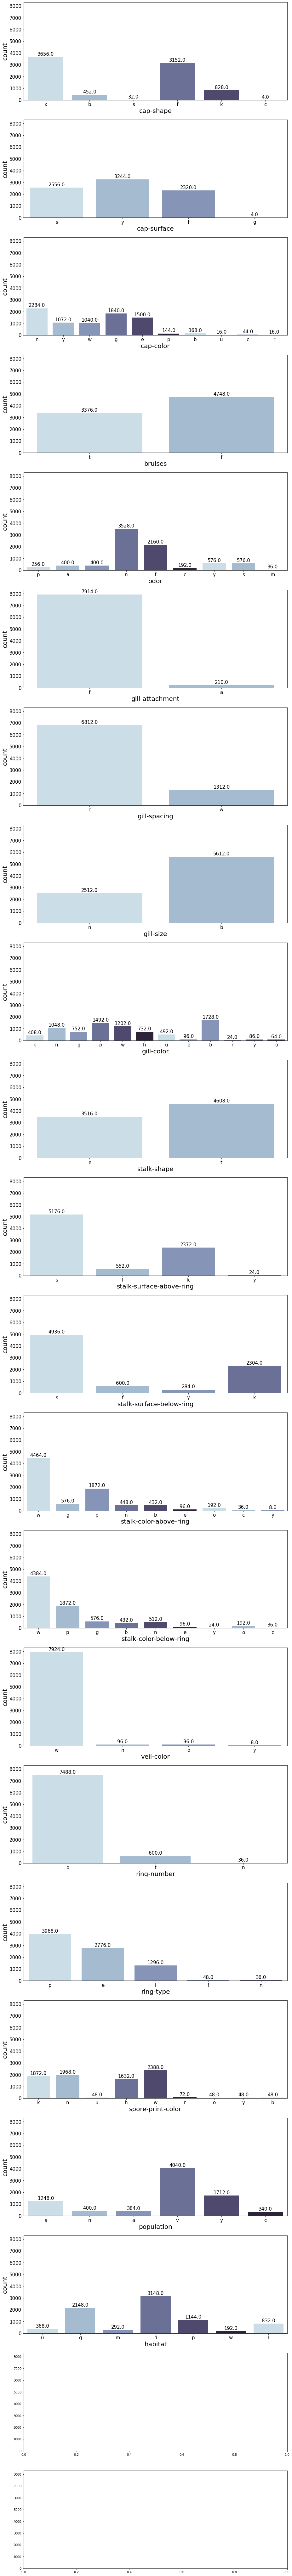

In [304]:
f, axes = plt.subplots(22,1, figsize=(15,150), sharey = True) 
k = 1
features = mush.columns
for i in range(20):
    s = sns.countplot(x = features[k], data = mush, ax=axes[i], palette = sns.color_palette("ch:s=.25,rot=-.25"))
    axes[i].set_xlabel(features[k], fontsize=20)
    axes[i].set_ylabel("count", fontsize=20)
    axes[i].tick_params(labelsize=15)
    k = k+1
    for p in s.patches:
        s.annotate(format(p.get_height(), '.1f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'center', 
        xytext = (0, 9), 
        fontsize = 15,
        textcoords = 'offset points')

모든 변수들이 character로 되어 있기 때문에 encoding 해준다

In [13]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [14]:
#ring-number(none=n, one=o, two=t): 변수 자체가 숫자로 바뀔 수 있는 변수이다
ringnb_dict = {'n':0,
              'o':1,
              't':2}
mush['ring-number'] = mush['ring-number'].map(ringnb_dict)

In [15]:
mush['ring-number'] = mush['ring-number'].astype('int64')

one hot encoding

In [16]:
#class, ring-number 제외하고 one hot encoding
mush = pd.get_dummies(mush, columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
      'ring-type', 'spore-print-color', 'population',
       'habitat'])

In [17]:
#class도 encoding(p:1, e:0)
mush['class'] = np.where(mush['class'].str.contains('p'), 1, 0)
mush.head()

,class,ring-number,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
# 확인
mush['class'].value_counts() # class= 0: edible, 1: poisonous

0    4208
1    3916
Name: class, dtype: int64

# 2. 데이터 나누기

In [19]:
mush.shape

(8124, 110)

In [20]:
X = mush.iloc[:,1:mush.shape[1]]
y = mush.iloc[:,0]

In [21]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int32

In [22]:
X.head()

,ring-number,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


PCA를 이용해 차원의 수를 줄여준다

In [23]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA()
pca.fit_transform(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

40

In [33]:
pca = PCA(n_components = 40)
X = pca.fit_transform(X)

train, test로 데이터를 나눈다

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=2020)

In [35]:
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size = 0.5, random_state = 2020)

In [36]:
# 확인
X_train.shape

(4874, 40)

In [37]:
X_test.shape

(1625, 40)

In [40]:
X_val.shape

(1625, 40)

In [38]:
y_train.shape

(4874,)

In [39]:
y_test.shape

(1625,)

In [41]:
y_val.shape

(1625,)

# 3. 데이터분석

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [43]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [44]:
log_reg.predict(X_test)

array([0, 1, 0, ..., 1, 1, 1])

In [45]:
cross_val_score(log_reg, X_val, y_val, cv=2, scoring="accuracy")

array([0.97416974, 0.97044335])

In [46]:
#scale 조정으로 accuracy 값 높이기
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(log_reg, X_train_scaled, y_train, cv=2, scoring="accuracy")

array([0.98317604, 0.98194501])

In [47]:
#test data 이용해서 정확도 측정
y_pred=log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[855   7]
 [ 20 743]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       862
           1       0.99      0.97      0.98       763

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



### SVM

선형 SVM 분류

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [56]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=2020))
])

svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=1, loss='hinge', random_state=2020))])

In [57]:
cross_val_score(svm_clf, X_val, y_val, cv=2, scoring="accuracy")

array([0.98769988, 0.97660099])

In [58]:
#scale 조정으로 accuracy 값 높이기
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(svm_clf, X_train_scaled, y_train, cv=2, scoring="accuracy")

array([0.98563808, 0.98810012])

In [59]:
#test data 이용해서 정확도 측정
y_pred=svm_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[862   0]
 [ 18 745]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       862
           1       1.00      0.98      0.99       763

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



SGD Classifier 이용

In [60]:
from sklearn.linear_model import SGDClassifier

In [61]:
m = X_train.shape[0]
C = 1.0

svm_clf_SGD = Pipeline([
    ('scaler',StandardScaler()),
    ('SGD_linear', SGDClassifier(loss='hinge', alpha = 1/(m*C), random_state = 2020))
])

svm_clf_SGD.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SGD_linear',
                 SGDClassifier(alpha=0.0002051702913418137,
                               random_state=2020))])

In [62]:
cross_val_score(svm_clf_SGD, X_val, y_val, cv=2, scoring="accuracy")

array([0.9803198 , 0.97783251])

In [63]:
#scale 조정으로 accuracy 값 높이기
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(svm_clf_SGD, X_train_scaled, y_train, cv=2, scoring="accuracy")

array([0.98440706, 0.97537957])

In [64]:
#test data 이용해서 정확도 측정
y_pred=svm_clf_SGD.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[858   4]
 [ 18 745]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       862
           1       0.99      0.98      0.99       763

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



SVM 선형 회귀

In [76]:
from sklearn.svm import LinearSVR

In [309]:
svm_reg = LinearSVR(epsilon = 2, random_state = 2020)
svm_reg.fit(X_train, y_train)

LinearSVR(epsilon=2, random_state=2020)

In [310]:
cross_val_score(svm_reg, X_val, y_val, cv=2, scoring="accuracy")

array([0.51414514, 0.50246305])

In [311]:
#scale 조정으로 accuracy 값 높이기
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(svm_reg, X_train_scaled, y_train, cv=2, scoring="accuracy")

array([0.51702913, 0.51702913])

In [312]:
#test data 이용해서 정확도 측정
y_pred=svm_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1688    0]
 [1562    0]]
              precision    recall  f1-score   support

           0       0.52      1.00      0.68      1688
           1       0.00      0.00      0.00      1562

    accuracy                           0.52      3250
   macro avg       0.26      0.50      0.34      3250
weighted avg       0.27      0.52      0.36      3250



### Decision Tree

결정트리학습

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [274]:
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [275]:
cross_val_score(tree_clf, X_val, y_val, cv=2, scoring="accuracy")

array([0.96432964, 0.96921182])

In [276]:
#scale 조정으로 accuracy 값 높이기
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(tree_clf, X_train_scaled, y_train, cv=2, scoring="accuracy")

array([0.95322117, 0.96142799])

In [277]:
#test data 이용해서 정확도 측정
y_pred=tree_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1654   34]
 [  96 1466]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1688
           1       0.98      0.94      0.96      1562

    accuracy                           0.96      3250
   macro avg       0.96      0.96      0.96      3250
weighted avg       0.96      0.96      0.96      3250



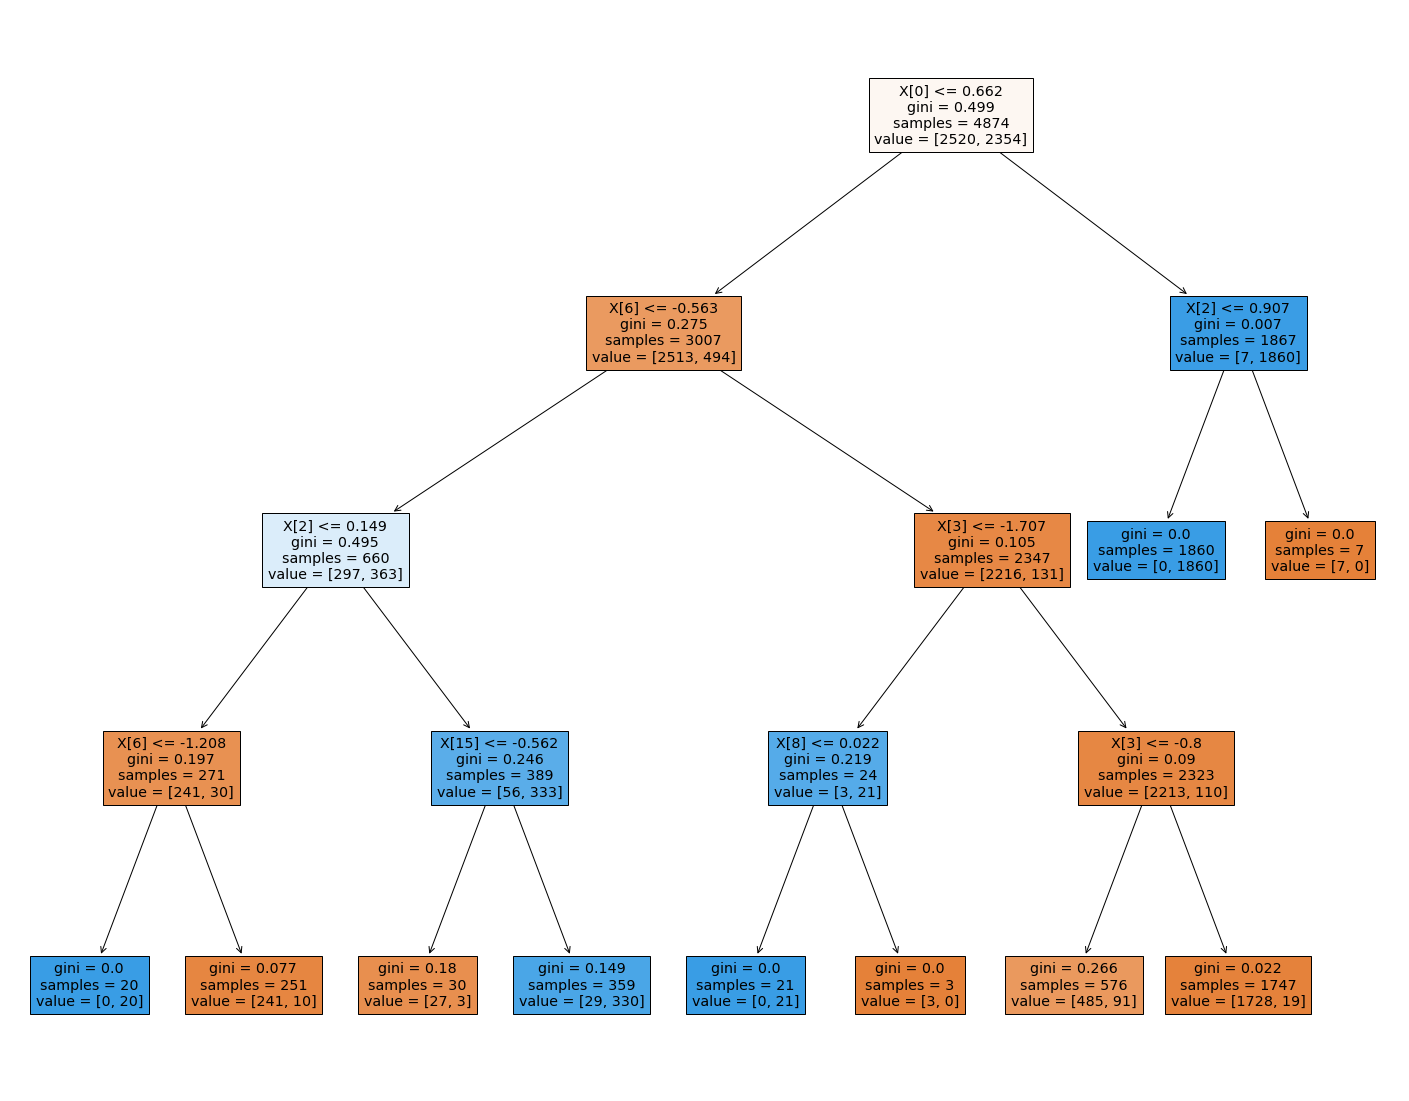

In [278]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf,filled=True)

In [279]:
fig.savefig('decision_tree.jpg')

### Random Forest

random forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [249]:
rnd_clf = RandomForestClassifier(n_estimators = 2, random_state = 2020)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2, random_state=2020)

In [250]:
cross_val_score(rnd_clf, X_val, y_val, cv=2, scoring="accuracy")

array([0.93234932, 0.94704433])

In [251]:
#scale 조정으로 accuracy 값 높이기
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(rnd_clf, X_train_scaled, y_train, cv=2, scoring="accuracy")

array([0.9585556, 0.9544522])

In [252]:
#test data 이용해서 정확도 측정
y_pred=rnd_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1687    1]
 [  64 1498]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1688
           1       1.00      0.96      0.98      1562

    accuracy                           0.98      3250
   macro avg       0.98      0.98      0.98      3250
weighted avg       0.98      0.98      0.98      3250



### Bagging & Pasting

bagging

In [119]:
from sklearn.ensemble import BaggingClassifier

In [280]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(random_state = 2020), n_estimators = 100,
max_samples = 100, bootstrap = True, random_state = 2020)

bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=2020),
                  max_samples=100, n_estimators=100, random_state=2020)

In [281]:
cross_val_score(bag_clf, X_val, y_val, cv=2, scoring="accuracy")

array([0.95694957, 0.9544335 ])

In [282]:
#scale 조정으로 accuracy 값 높이기
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(bag_clf, X_train_scaled, y_train, cv=2, scoring="accuracy")

array([0.94829709, 0.96101764])

In [283]:
#test data 이용해서 정확도 측정
y_pred = bag_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1662   26]
 [ 127 1435]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1688
           1       0.98      0.92      0.95      1562

    accuracy                           0.95      3250
   macro avg       0.96      0.95      0.95      3250
weighted avg       0.95      0.95      0.95      3250



pasting

In [284]:
paste_clf = BaggingClassifier(
DecisionTreeClassifier(random_state = 2020), n_estimators = 100,
max_samples = 100, bootstrap = False, random_state = 2020)

paste_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=2020),
                  bootstrap=False, max_samples=100, n_estimators=100,
                  random_state=2020)

In [285]:
cross_val_score(paste_clf, X_val, y_val, cv=2, scoring="accuracy")

array([0.94710947, 0.94704433])

In [286]:
#scale 조정으로 accuracy 값 높이기
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(paste_clf, X_train_scaled, y_train, cv=2, scoring="accuracy")

array([0.95486254, 0.95732458])

In [287]:
#test data 이용해서 정확도 측정
y_pred = paste_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1662   26]
 [ 135 1427]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1688
           1       0.98      0.91      0.95      1562

    accuracy                           0.95      3250
   macro avg       0.95      0.95      0.95      3250
weighted avg       0.95      0.95      0.95      3250



### Boosting

In [128]:
from sklearn.ensemble import AdaBoostClassifier

In [288]:
ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=5), n_estimators=100,
algorithm = 'SAMME.R', learning_rate = 0.5, random_state = 2020)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.5, n_estimators=100, random_state=2020)

In [130]:
cross_val_score(ada_clf, X_val, y_val, cv=2, scoring="accuracy")

array([0.98769988, 0.97906404])

In [131]:
#scale 조정으로 accuracy 값 높이기
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(ada_clf, X_train_scaled, y_train, cv=2, scoring="accuracy")

array([0.99753796, 0.99425523])

In [74]:
#test data 이용해서 정확도 측정
y_pred = ada_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 528    0]
 [  44 1552]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       528
           1       1.00      0.97      0.99      1596

    accuracy                           0.98      2124
   macro avg       0.96      0.99      0.97      2124
weighted avg       0.98      0.98      0.98      2124

